In [8]:
# train_model.py
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_csv("C:/Users/venka/OneDrive/Desktop/DL project/Data/WIPRO.csv")
data = data.sort_values("Date")

# Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']
dataset = data[features].values

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

# Prepare sequences
time_steps = 60
X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i])
    y.append(scaled_data[i, 3])  # 'Close' is target

X, y = np.array(X), np.array(y)

# Build CNN + LSTM Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# Save model and scaler
model.save("model/stock_model.h5")
import joblib
joblib.dump(scaler, "model/scaler.pkl")


C:\Users\venka\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - loss: 0.0010 - val_loss: 5.5632e-05
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 1.7939e-04 - val_loss: 7.4590e-05
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 1.4732e-04 - val_loss: 1.1269e-05
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 1.7010e-04 - val_loss: 3.6627e-05
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 1.4417e-04 - val_loss: 3.1262e-05
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 1.0522e-04 - val_loss: 4.2082e-05
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 1.0292e-04 - val_loss: 1.9388e-05
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 1.0244e-04 - val_loss: 8.6263e-06
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 1.0320e-04 - val_loss: 1.9753e-05
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 1.2017e-04 - val_loss: 3.8343e-05
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/ste

['model/scaler.pkl']

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


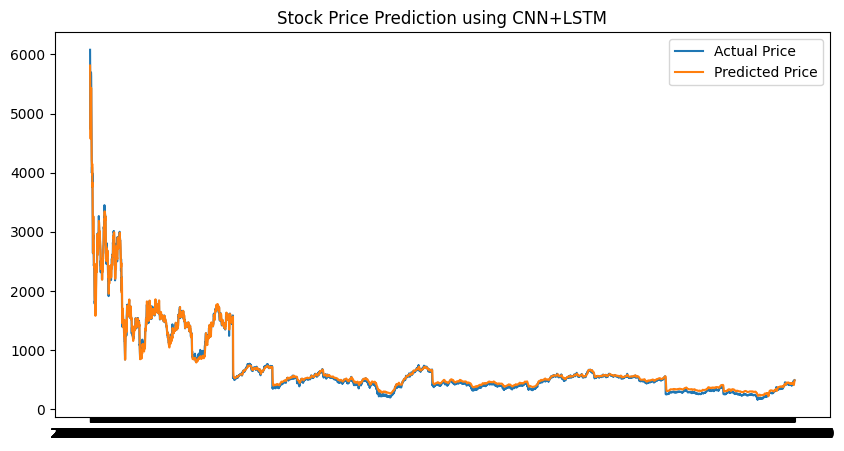

In [10]:
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(
    np.concatenate((np.zeros((len(predicted), dataset.shape[1]-1)), predicted), axis=1)
)[:, -1]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Date'][time_steps:], data['Close'][time_steps:], label="Actual Price")
plt.plot(data['Date'][time_steps:], predicted_prices, label="Predicted Price")
plt.legend()
plt.title("Stock Price Prediction using CNN+LSTM")
plt.show()
